# <center>Insurance Cost</center>

## Dataset
   - Dataset : https://www.kaggle.com/brandonyongys/insurance-charges/data
   - Problem State : Regression
   - Dataset Type : Numarical, Categorical.
   - Problem Statement : Predict the relation and insurance cost. 

#### Data Details
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and charges) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value desginated for each level.
The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

Load dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pylab 
import scipy.stats as stats

In [2]:
df = pd.read_csv("insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Analysis
- Total Columns 7 and rows are 1338  
- No missing values
- Present Datatypes 
    - int64
    - object(char)
    - float 

#### Label Encoding

In [4]:
num_var = []
cat_var = []
for i in df.columns:
    y = df[i].unique()
    if len(y) >= 10:
        num_var.append(i)
        print("- {} is numarical variable".format(i))
    else :
        cat_var.append(i)
        print("* {} is categorical variable and unique values are : {}".format(i , y))

- age is numarical variable
* sex is categorical variable and unique values are : ['female' 'male']
- bmi is numarical variable
* children is categorical variable and unique values are : [0 1 3 2 5 4]
* smoker is categorical variable and unique values are : ['yes' 'no']
* region is categorical variable and unique values are : ['southwest' 'southeast' 'northwest' 'northeast']
- charges is numarical variable


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)  
data=MultiColumnLabelEncoder(columns = ['sex', 'smoker','region']).fit_transform(df)

In [6]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Labels:
   - Sex
       - 0 : female
       - 1 : male
   - Smoker
       - 0 : no
       - 1 : yes
   - Region 
       - 0 : northeast
       - 1 : northwest
       - 2 : southeast
       - 3 : southwest 

#### Central Tendency

In [7]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Analysis :
- 'age' : Age is centralize around the 39 to 40 age. and Total age range is 18 to 64.
- 'sex' : Gender is categories into two types, Male and female.
- 'bmi' : BMI values are centralize around 30.4.
- 'children' : Average values of having childen is one and it's range is form 0 to 6
- 'smoker' : Data is categories into smokers and non-smokers
- 'region' : Three types of regions 0, 1, 2, 3 :like southwest, northwest, etc
- 'charges : Centered around 13270.422265 and spread is large for entire charge dataset. 

### Exploratery Data Analysis

#### Univariant 

- children is not the uniform variables

age


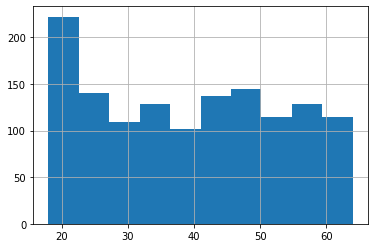

bmi


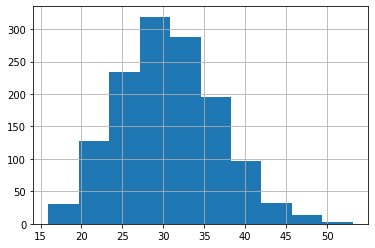

charges


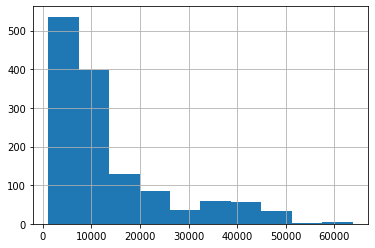

In [8]:
for i in num_var:
    print(i)
    df[i].hist()
    plt.show()

For checking data distribution

age


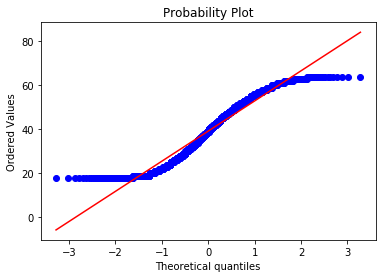

bmi


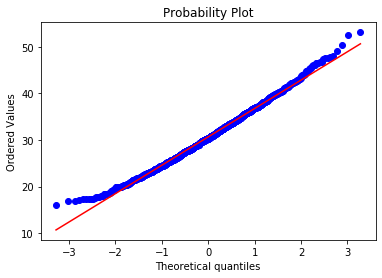

charges


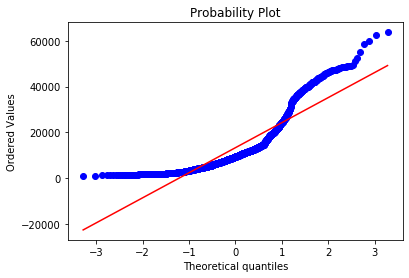

In [9]:
for i in num_var:
    print(i)
    stats.probplot(data[i], dist="norm", plot=pylab)
    pylab.show()

Analysis
- only bmi is normal distribution
    - we can state that 68% of the data is covered in the range of 23.91 and 36.09 
- Other columns are not normal distribution
- This plot indicates that the model’s residuals are not normally distributed. Something to note is that visual representation of data is always subjective, but they are not bad to include because they visually show characteristics of the data that formal statistical testing cannot.

CATEGORICAL VARIABLES

sex


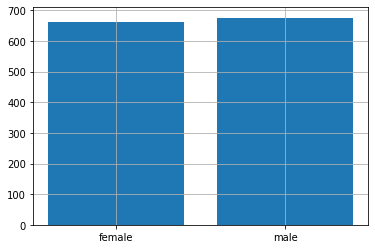

children


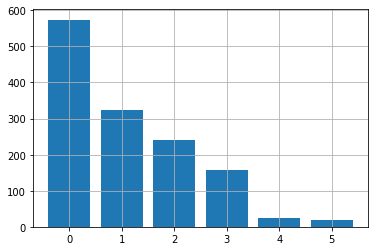

smoker


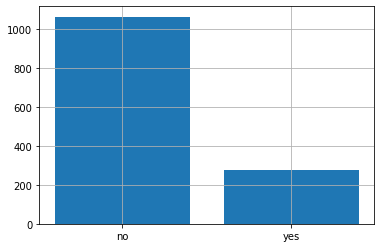

region


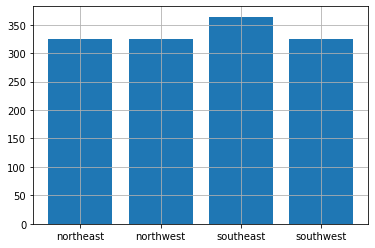

In [10]:
for i in cat_var:
    print(i)
    ########################
    key_list=df[i]
    unique_elements, counts_elements = np.unique(key_list, return_counts=True)
    ########################
    height = counts_elements
    bars =  unique_elements
    y_pos = np.arange(len(bars))
    # Create bars    
    # Create bars
    plt.bar(y_pos, height)
    # Create names on the x-axis
    plt.xticks(y_pos, bars)
    #Show grids
    plt.grid()
    # Show graphic
    plt.show()


Analysis
- For sex variables data is equally distributed.
- For childerns, many of the peples dont have child.

#### Bivariant Distribution

Text(0.5, 1.0, 'Distribution of charges by age and charges')

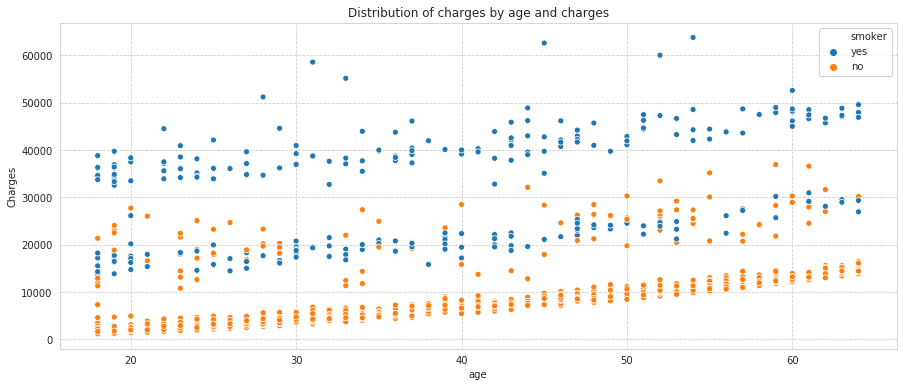

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (15,6))
sns.scatterplot(x = "age", y = "charges", data = df, hue = "smoker")
plt.xlabel("age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and charges")

Analysis
- Noramlly we can state that as age goes on increaseing at charges slightly increases(Small positive correlation).
- Based on the Smoker 
    - For age values and smokers charges are higher.
    - For age vaues and non smokers are lower.

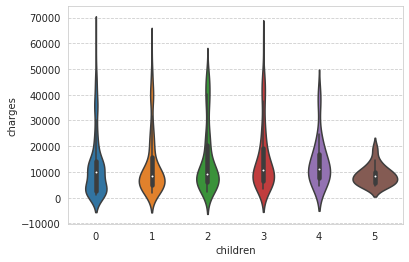

In [12]:
sns.violinplot(x="children", y="charges", data=data, size=8)
plt.show()

Analysis : 
- As children size goes on incresing charge range decreasing.
- Average values are same but the range is different.

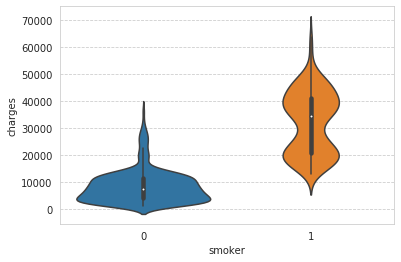

In [13]:
sns.violinplot(x="smoker", y="charges", data=data, size=8)
plt.show()

Analysis : 
- For smokers, range for the charge is large.
- For non-smokers charges are low.

In [14]:
print("For Charges, correaltion with the other variables are :")
data.corr().charges

For Charges, correaltion with the other variables are :


age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

Analysis
- smoking is the top one reason to attribute the high costs.
- age also very important parameter for charges 
- bmi is also shows positive relation with the charges

#### Logistic regression.
- separate charges into high costs and low costs.
- Taking median value of charges as a threshold value.

In [15]:
def categories(value):
    if value > 9382.033:
        return 1
    else:
        return 0
data['high/low'] = data.apply(lambda x: categories(x.charges), axis=1)

In [16]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['high/low']

In [17]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test= train_test_split(X, y, test_size = 0.25, random_state = 0)

In [19]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = classifier.predict(x_test) 

In [21]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 

print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[154  20]
 [ 14 147]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       174
           1       0.88      0.91      0.90       161

    accuracy                           0.90       335
   macro avg       0.90      0.90      0.90       335
weighted avg       0.90      0.90      0.90       335



In [23]:
from sklearn.metrics import accuracy_score 
print ("Accuracy of the model is : ", accuracy_score(y_test, y_pred)) 

Accuracy of the model is :  0.8985074626865671


### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
# Model is trained and then used on test dataset
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

# Coefficients and intercept of linear regression model extracted
model_coef = pd.DataFrame(data = model1.coef_, index = x_test.columns)
model_coef.loc["intercept", 0] = model1.intercept_ 
display(model_coef)

# Model's performance
model_performance = pd.DataFrame(data = [r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))],
                                 index = ["R2","RMSE"])
display(model_performance)

,0
age,0.018844
sex,-0.009731
bmi,0.004200
children,-0.002685
smoker,0.654020
region,-0.028106
intercept,-0.442472


,0
R2,0.527594
RMSE,0.343400
